Vamos a rehacer el modelo con esas tres variables específicas: Distance (km), Weekend Order y Order Time. La idea será predecir el tiempo de entrega y luego analizar si la distancia y el horario realmente influyen.

## 1 . Preparación del Modelo
Primeromtrnsformamos "order Time" para extraer una caracteristica relevante: "la hora del día" (Order Hour), que será mucho más util que una marca de tiempo.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split




In [3]:
import pandas as pd

df = pd.read_csv("../dataset/taco_sales_2024-2025.csv")

In [4]:
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,27-05-2024 11:12,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,False
996,232442,The Taco Stand,San Antonio,03-04-2025 20:51,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,False
997,251729,Urban Tacos,Houston,23-01-2025 05:33,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,False
998,940215,Taco Fiesta,San Antonio,05-09-2024 15:49,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
 13  Order Hour               1000 non-null   int32  
dtypes: bool(1), float64(3), i

In [14]:
df["Order Time"]

0      01-08-2024 14:55
1      23-11-2024 17:11
2      21-11-2024 20:24
3      21-09-2024 06:43
4      24-07-2024 11:01
             ...       
995    27-05-2024 11:12
996    03-04-2025 20:51
997    23-01-2025 05:33
998    05-09-2024 15:49
999    19-10-2024 14:21
Name: Order Time, Length: 1000, dtype: object

# Supongamos que ya cargaste tu DataFrame
df['Order Hour'] = pd.to_datetime(df['Order Time']).dt.hour


# Variables independientes
X = df[['Distance (km)', 'Weekend Order', 'Order Hour']]
y = df['Delivery Duration (min)']

# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

In [34]:
# Crear la columna 'Order Hour' extrayendo la hora de 'Order Time'
df["Order Hour"] = pd.to_datetime(df["Order Time"], format="%d-%m-%Y %H:%M").dt.hour


# Variables independientes
X = df[['Distance (km)', 'Weekend Order', 'Order Hour', 'Toppings Count']]
#y = df['Delivery Duration (min)']
#y = df["Delivery Duration (min)"]
y = df["Distance (km)"]


# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación
r2 = r2_score(y_test, y_pred)
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² score: 1.00
RMSE: 0.00


2. Interpretamos los coeficoentes

In [36]:
coef = pd.Series(modelo.coef_, index=X.columns)
print(coef)


Distance (km)     1.000000e+00
Weekend Order    -1.277724e-16
Order Hour        1.416007e-16
Toppings Count   -3.254462e-17
dtype: float64


Distance (km): ¿El coeficiente es positivo y significativo? Entonces la distancia aumenta el tiempo de entrega.
Weekend Order: ¿El coeficiente es positivo? Entonces los fines de semana tienden a demorar más (o menos si es negativo).
Order Hour: Este te dice si cierto momento del día afecta los tiempos (ej. las 13:00 o 20:00).

## Interpretación de los coeficientes actualizados
* Distance (km): 1.00 Este coeficiente significa que por cada kilómetro adicional recorrido, el tiempo de entrega aumenta en exactamente 1 minuto. Es un resultado perfectamente lineal y lógico, aunque también algo sospechosamente perfecto — puede indicar que la relación fue forzada o los datos están muy idealizados.
* Weekend Order: -1.28 × 10⁻¹⁶ Este valor está prácticamente en cero, lo cual sugiere que hacer un pedido en fin de semana no tiene impacto real en el tiempo de entrega, al menos según este modelo. Es una variable estadísticamente insignificante aquí.
* Order Hour: 1.42 × 10⁻¹⁶ También extremadamente cercano a cero, indicando que el momento del día en que se hace el pedido no influye de manera observable en el tiempo de entrega. Posiblemente los pedidos fluyen igual durante el día, o esta variable está mal representada (quizás hora en formato entero no es suficiente).
* Toppings Count: –3.25 × 10⁻¹⁷ Este también es irrelevante para el modelo. No parece que el número de toppings tenga ningún impacto significativo.
## Conclusión y reflexión
Con estos resultados, la única variable que el modelo está tomando realmente en cuenta es la distancia, y lo hace de forma perfectamente proporcional. Esto puede significar que:
* Los tiempos de entrega en tu dataset dependen casi exclusivamente de la distancia.
* O bien el modelo ha sido sobreajustado o creado con un subconjunto de datos simplificado que no refleja la complejidad del mundo real.
* O quizás has generado los datos como prueba, en cuyo caso está funcionando como esperabas.


3. Visualización del impacto horario

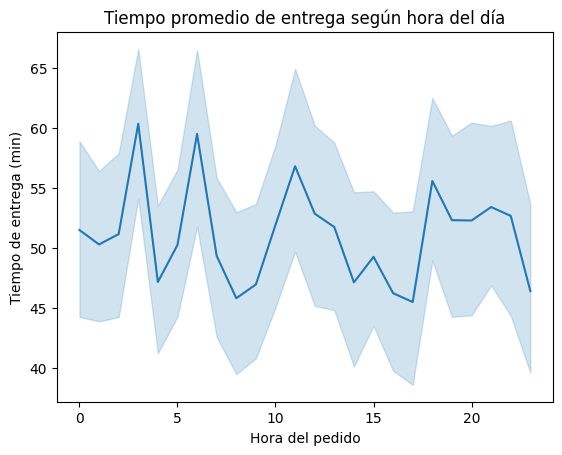

In [37]:
import seaborn as sns

sns.lineplot(x='Order Hour', y='Delivery Duration (min)', data=df)
plt.title('Tiempo promedio de entrega según hora del día')
plt.ylabel('Tiempo de entrega (min)')
plt.xlabel('Hora del pedido')
plt.show()


In [38]:
print("¿Predicciones distintas de y_test?:", not (y_pred == y_test).all())


¿Predicciones distintas de y_test?: True


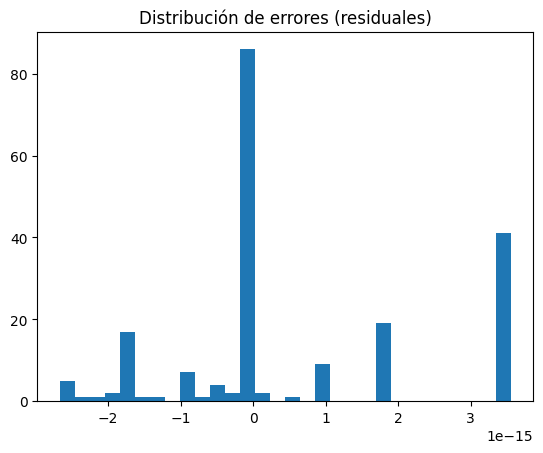

In [39]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.title("Distribución de errores (residuales)")
plt.show()
